In [1]:
import re
import pandas as pd

# 1. Read the data from the text file
filename = "training_output.txt"

try:
    with open(filename, "r") as f:
        log_data = f.read()
except FileNotFoundError:
    print(
        f"Error: The file '{filename}' was not found. Please ensure it is in the same directory."
    )
    log_data = ""  # Prevent regex error if file is missing

# 2. Define the Regex Pattern
# Break down:
# Train Loss:\s+([\d\.]+)  -> Finds "Train Loss:", spaces, then captures the number (digits and dots)
# .*?                      -> Matches any characters in between (non-greedy)
# Train Acc:\s+([\d\.]+)   -> Captures Train Acc
# \s+                      -> Matches newlines/whitespace between the Train and Val lines
# Val Loss:\s+([\d\.]+)    -> Captures Val Loss
# .*?                      -> Matches characters in between
# Val Acc:\s+([\d\.]+)     -> Captures Val Acc
pattern = r"Train Loss:\s+([\d\.]+).*?Train Acc:\s+([\d\.]+)\s+Val Loss:\s+([\d\.]+).*?Val Acc:\s+([\d\.]+)"

# 3. Extract data using re.findall
# This returns a list of tuples: [('2.7097', '0.130', '2.6980', '0.121'), ...]
matches = re.findall(pattern, log_data)

# 4. Convert to a clean list of dictionaries (Python Array) with floats
parsed_data = []
for i, match in enumerate(matches):
    parsed_data.append(
        {
            "epoch": i + 1,
            "train_loss": float(match[0]),
            "train_acc": float(match[1]),
            "val_loss": float(match[2]),
            "val_acc": float(match[3]),
        }
    )

# Output the simple array
print("--- Python List of Dictionaries ---")
for entry in parsed_data:
    print(entry)

# ---------------------------------------------------------
# OPTIONAL: Convert to Pandas DataFrame (Best for plotting)
# ---------------------------------------------------------
print("\n--- Pandas DataFrame (Easier for Analysis) ---")
df = pd.DataFrame(parsed_data)
print(df)

# Example: Get just the validation accuracies as an array
val_acc_array = df["val_acc"].tolist()
print(f"\nValidation Accuracies only: {val_acc_array}")

--- Python List of Dictionaries ---
{'epoch': 1, 'train_loss': 2.7097, 'train_acc': 0.13, 'val_loss': 2.698, 'val_acc': 0.121}
{'epoch': 2, 'train_loss': 2.6291, 'train_acc': 0.162, 'val_loss': 2.6867, 'val_acc': 0.118}
{'epoch': 3, 'train_loss': 2.5928, 'train_acc': 0.171, 'val_loss': 2.6852, 'val_acc': 0.115}
{'epoch': 4, 'train_loss': 2.5721, 'train_acc': 0.173, 'val_loss': 2.6908, 'val_acc': 0.119}
{'epoch': 5, 'train_loss': 2.5594, 'train_acc': 0.179, 'val_loss': 2.6972, 'val_acc': 0.107}
{'epoch': 6, 'train_loss': 2.5508, 'train_acc': 0.18, 'val_loss': 2.7032, 'val_acc': 0.115}
{'epoch': 7, 'train_loss': 2.545, 'train_acc': 0.178, 'val_loss': 2.7104, 'val_acc': 0.106}
{'epoch': 8, 'train_loss': 2.5405, 'train_acc': 0.181, 'val_loss': 2.716, 'val_acc': 0.102}
{'epoch': 9, 'train_loss': 2.5374, 'train_acc': 0.179, 'val_loss': 2.7198, 'val_acc': 0.105}
{'epoch': 10, 'train_loss': 2.535, 'train_acc': 0.181, 'val_loss': 2.7248, 'val_acc': 0.103}
{'epoch': 11, 'train_loss': 2.5332, 'tr

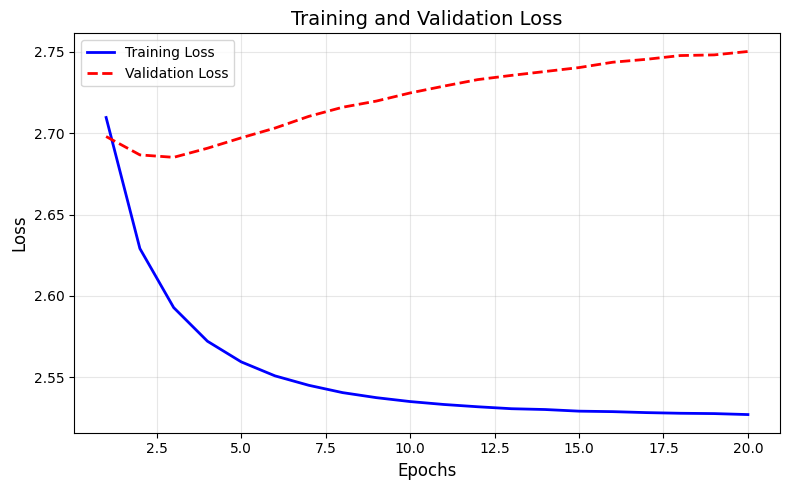

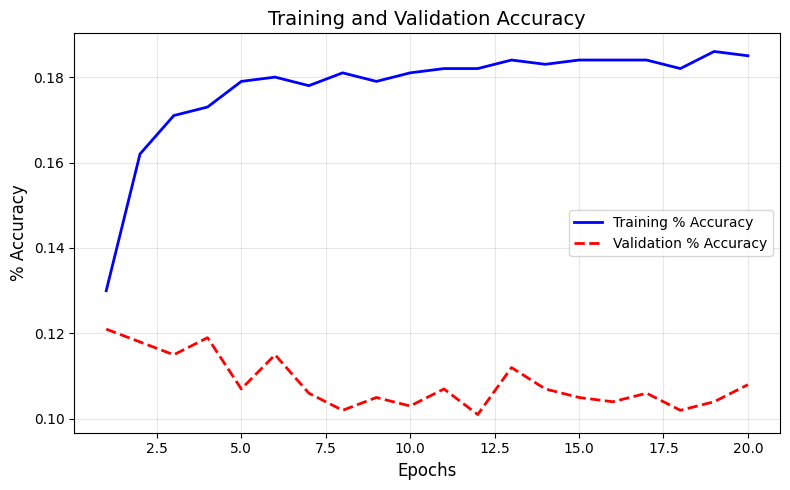

In [2]:
from utils import plot_metric

train_loss = df["train_loss"].tolist()
val_loss = df["val_loss"].tolist()

train_acc = df["train_acc"].tolist()
val_acc = df["val_acc"].tolist()

plot_metric(train_loss, val_loss, "Training and Validation Loss", ylabel="Loss")
plot_metric(train_acc, val_acc, "Training and Validation Accuracy", ylabel="% Accuracy")

In [1]:
import re
import pandas as pd

# 1. Read the data from the text file
filename = "training_output_efficientnetv2.txt"

try:
    with open(filename, "r") as f:
        log_data = f.read()
except FileNotFoundError:
    print(
        f"Error: The file '{filename}' was not found. Please ensure it is in the same directory."
    )
    log_data = ""  # Prevent regex error if file is missing

# 2. Define the Regex Pattern
# New Format: Epoch 00 | train 2.7329/0.099 | val 2.7114/0.108
# Break down:
# Epoch\s+(\d+)            -> Captures "Epoch" and the number
# \s+\|\s+train\s+         -> Matches " | train " separator
# ([\d\.]+)/([\d\.]+)      -> Captures train_loss / train_acc (split by slash)
# \s+\|\s+val\s+           -> Matches " | val " separator
# ([\d\.]+)/([\d\.]+)      -> Captures val_loss / val_acc (split by slash)
pattern = r"Epoch\s+(\d+)\s+\|\s+train loss\s+([\d\.]+)/\s*train accuracy\s+([\d\.]+)\s+\|\s+val loss\s+([\d\.]+)/\s*val accuracy\s+([\d\.]+)"


# 3. Extract data using re.findall
# Returns list of tuples: [('00', '2.7329', '0.099', '2.7114', '0.108'), ...]
matches = re.findall(pattern, log_data)

# 4. Convert to a clean list of dictionaries
parsed_data = []
for match in matches:
    parsed_data.append(
        {
            "epoch": int(match[0]),  # Now capturing specific epoch number
            "train_loss": float(match[1]),
            "train_acc": float(match[2]),
            "val_loss": float(match[3]),
            "val_acc": float(match[4]),
        }
    )

# Output the simple array
print("--- Python List of Dictionaries ---")
for entry in parsed_data:
    print(entry)

# ---------------------------------------------------------
# OPTIONAL: Convert to Pandas DataFrame (Best for plotting)
# ---------------------------------------------------------
print("\n--- Pandas DataFrame (Easier for Analysis) ---")
df = pd.DataFrame(parsed_data)
print(df)

# Example: Get just the validation accuracies as an array
val_acc_array = df["val_acc"].tolist()
print(f"\nValidation Accuracies only: {val_acc_array}")

--- Python List of Dictionaries ---
{'epoch': 1, 'train_loss': 2.8687, 'train_acc': 0.07, 'val_loss': 2.762, 'val_acc': 0.098}
{'epoch': 2, 'train_loss': 2.7997, 'train_acc': 0.088, 'val_loss': 2.7506, 'val_acc': 0.1}
{'epoch': 3, 'train_loss': 2.7792, 'train_acc': 0.096, 'val_loss': 2.7431, 'val_acc': 0.101}
{'epoch': 4, 'train_loss': 2.7625, 'train_acc': 0.103, 'val_loss': 2.7364, 'val_acc': 0.102}
{'epoch': 5, 'train_loss': 2.7449, 'train_acc': 0.107, 'val_loss': 2.7345, 'val_acc': 0.099}
{'epoch': 6, 'train_loss': 2.7305, 'train_acc': 0.11, 'val_loss': 2.7335, 'val_acc': 0.102}
{'epoch': 7, 'train_loss': 2.7234, 'train_acc': 0.119, 'val_loss': 2.737, 'val_acc': 0.11}
{'epoch': 8, 'train_loss': 2.7158, 'train_acc': 0.116, 'val_loss': 2.7318, 'val_acc': 0.106}
{'epoch': 0, 'train_loss': 2.6994, 'train_acc': 0.127, 'val_loss': 2.7296, 'val_acc': 0.111}
{'epoch': 1, 'train_loss': 2.6793, 'train_acc': 0.135, 'val_loss': 2.7296, 'val_acc': 0.116}
{'epoch': 2, 'train_loss': 2.6553, 'train

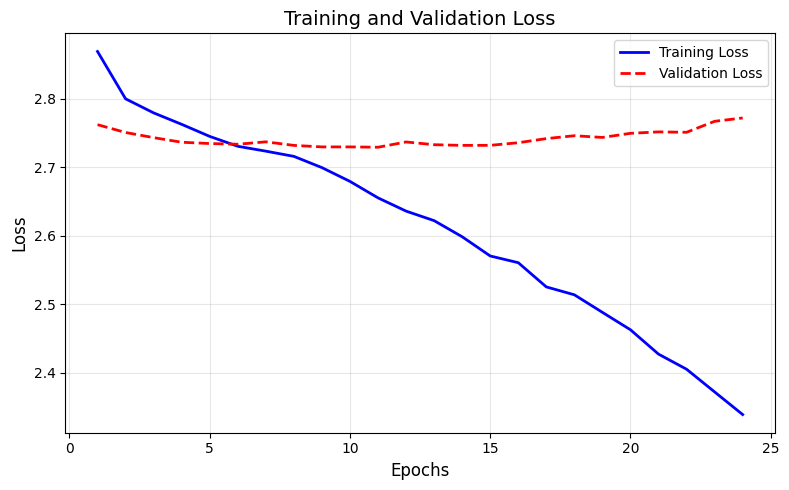

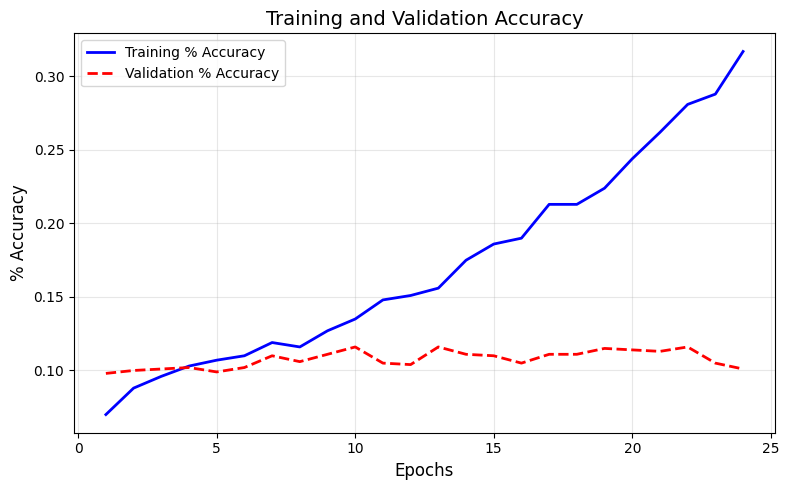

In [2]:
from utils import plot_metric

train_loss = df["train_loss"].tolist()
val_loss = df["val_loss"].tolist()

train_acc = df["train_acc"].tolist()
val_acc = df["val_acc"].tolist()

plot_metric(train_loss, val_loss, "Training and Validation Loss", ylabel="Loss")
plot_metric(train_acc, val_acc, "Training and Validation Accuracy", ylabel="% Accuracy")

--- Data Extracted ---
   epoch  global_train_acc  global_val_acc  val_loss_IE  val_loss_NS  \
0      1             0.549           0.586         0.68         0.68   
1      2             0.575           0.579         0.68         0.68   
2      3             0.583           0.581         0.68         0.68   
3      4             0.587           0.588         0.67         0.68   
4      5             0.592           0.582         0.68         0.68   

   val_loss_TF  val_loss_JP  val_acc_IE  val_acc_NS  val_acc_TF  val_acc_JP  
0         0.67         0.68        0.59        0.57        0.61        0.57  
1         0.68         0.68        0.58        0.58        0.59        0.57  
2         0.68         0.67        0.59        0.57        0.58        0.58  
3         0.67         0.68        0.60        0.57        0.60        0.58  
4         0.68         0.68        0.59        0.57        0.58        0.58  


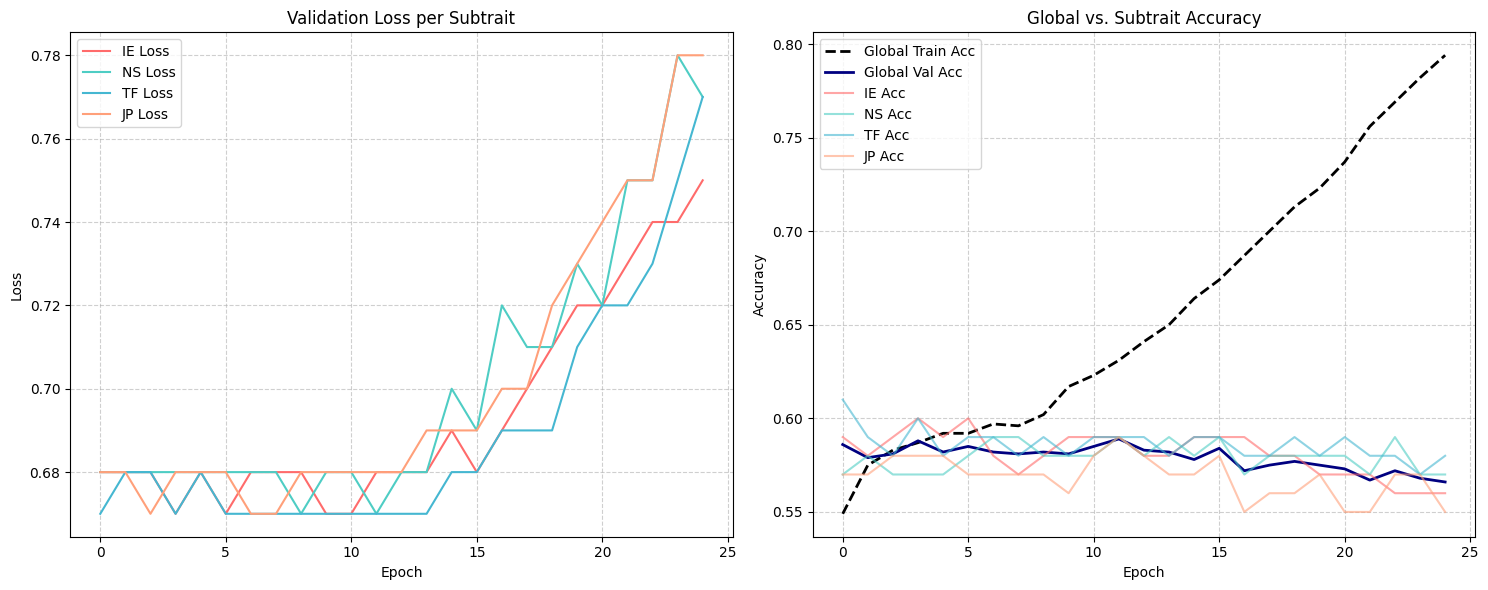

In [4]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read the data from the text file
filename = (
   "training_output_resnet18_multihead_corrected.txt"
)

try:
    with open(filename, "r") as f:
        log_data = f.read()
except FileNotFoundError:
    print(f"Error: The file '{filename}' was not found.")
    log_data = ""

pattern = (
    r"Epoch\s+(\d+)\s+\|"
    r"\s+Global Tr Acc:\s+([\d\.]+)\s+\|"
    r"\s+Global Val Acc:\s+([\d\.]+)"
    r"\s+Val Loss\s+->\s+IE:([\d\.]+)\s+NS:([\d\.]+)\s+TF:([\d\.]+)\s+JP:([\d\.]+)"
    r"\s+Val Acc\s+->\s+IE:([\d\.]+)\s+NS:([\d\.]+)\s+TF:([\d\.]+)\s+JP:([\d\.]+)"
)

matches = re.findall(pattern, log_data)

# 3. Organize into a list of dictionaries
parsed_data = []
for match in matches:
    entry = {
        "epoch": int(match[0]),
        "global_train_acc": float(match[1]),
        "global_val_acc": float(match[2]),
        # subtrait losses
        "val_loss_IE": float(match[3]),
        "val_loss_NS": float(match[4]),
        "val_loss_TF": float(match[5]),
        "val_loss_JP": float(match[6]),
        # subtrait accuracies
        "val_acc_IE": float(match[7]),
        "val_acc_NS": float(match[8]),
        "val_acc_TF": float(match[9]),
        "val_acc_JP": float(match[10]),
    }
    parsed_data.append(entry)

df = pd.DataFrame(parsed_data)

print("--- Data Extracted ---")
print(df.head())


# 4. Plotting Function
def plot_metrics(dataframe):
    if dataframe.empty:
        print("No data to plot.")
        return

    epochs = range(len(dataframe["epoch"]))

    # Create 2 subplots: one for Loss, one for Accuracy
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # --- Plot 1: Validation Losses (Traits) ---
    traits = ["IE", "NS", "TF", "JP"]
    colors = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#FFA07A"]

    for trait, color in zip(traits, colors):
        ax1.plot(
            epochs,
            dataframe[f"val_loss_{trait}"],
            label=f"{trait} Loss",
            color=color,
            # marker="o",
        )

    ax1.set_title("Validation Loss per Subtrait")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")
    ax1.legend()
    ax1.grid(True, linestyle="--", alpha=0.6)

    # --- Plot 2: Accuracies (Global vs Traits) ---
    # Plot Global Stats first (thicker lines)
    ax2.plot(
        epochs,
        dataframe["global_train_acc"],
        label="Global Train Acc",
        color="black",
        linestyle="--",
        linewidth=2,
    )
    ax2.plot(
        epochs,
        dataframe["global_val_acc"],
        label="Global Val Acc",
        color="navy",
        linewidth=2,
    )

    # Plot Trait Accuracies (thinner lines)
    for trait, color in zip(traits, colors):
        ax2.plot(
            epochs,
            dataframe[f"val_acc_{trait}"],
            label=f"{trait} Acc",
            color=color,
            alpha=0.6,
        )

    ax2.set_title("Global vs. Subtrait Accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    ax2.legend()
    ax2.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()


# Run the plot
plot_metrics(df)

--- Data Extracted ---
   epoch  train_acc  val_acc  val_loss_IE  val_loss_NS  val_loss_TF  \
0      0      0.552    0.572        0.664        0.687        0.688   
1      1      0.583    0.576        0.653        0.682        0.680   
2      2      0.588    0.567        0.651        0.686        0.676   
3      3      0.596    0.570        0.657        0.682        0.679   
4      4      0.599    0.588        0.654        0.680        0.670   

   val_loss_JP  
0        0.697  
1        0.693  
2        0.691  
3        0.693  
4        0.688  


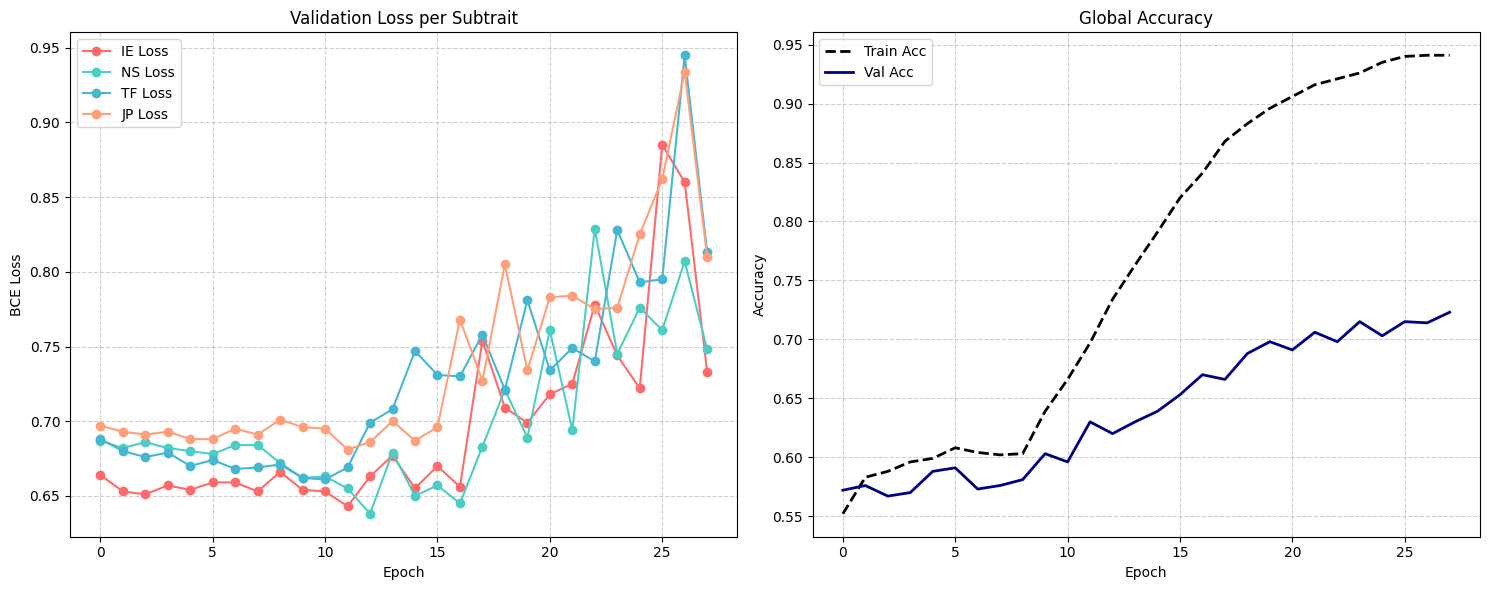

In [6]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read the data from the text file
filename = "training_output_resnet18_multihead.txt"

try:
    with open(filename, "r") as f:
        log_data = f.read()
except FileNotFoundError:
    print(f"Error: The file '{filename}' was not found.")
    log_data = ""

# 2. Define the Regex Pattern
# Matches format:
# Epoch 00 | Tr Acc: 0.603 | Va Acc: 0.581 | Val Losses -> IE:0.666 NS:0.672 TF:0.671 JP:0.701
pattern = (
    r"Epoch\s+(\d+)\s+\|\s+"  # Capture Epoch
    r"Tr Acc:\s+([\d\.]+)\s+\|\s+"  # Capture Train Acc
    r"Va Acc:\s+([\d\.]+)\s+\|\s+"  # Capture Val Acc
    r"Val Losses\s+->\s+"  # Anchor text
    r"IE:([\d\.]+)\s+"  # Capture IE Loss
    r"NS:([\d\.]+)\s+"  # Capture NS Loss
    r"TF:([\d\.]+)\s+"  # Capture TF Loss
    r"JP:([\d\.]+)"  # Capture JP Loss
)

matches = re.findall(pattern, log_data)

# 3. Organize into a list of dictionaries
parsed_data = []
for match in matches:
    entry = {
        "epoch": int(match[0]),
        "train_acc": float(match[1]),
        "val_acc": float(match[2]),
        # Subtrait losses
        "val_loss_IE": float(match[3]),
        "val_loss_NS": float(match[4]),
        "val_loss_TF": float(match[5]),
        "val_loss_JP": float(match[6]),
    }
    parsed_data.append(entry)

df = pd.DataFrame(parsed_data)

print("--- Data Extracted ---")
if not df.empty:
    print(df.head())
else:
    print("No matches found. Check regex or log file format.")


# 4. Plotting Function
def plot_metrics(dataframe):
    if dataframe.empty:
        print("No data to plot.")
        return

    epochs = range(len(dataframe["epoch"]))

    # Create 2 subplots side-by-side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # --- Plot 1: Validation Losses (Traits) ---
    traits = ["IE", "NS", "TF", "JP"]
    colors = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#FFA07A"]

    for trait, color in zip(traits, colors):
        # Ensure column exists before plotting
        col_name = f"val_loss_{trait}"
        if col_name in dataframe.columns:
            ax1.plot(
                epochs,
                dataframe[col_name],
                label=f"{trait} Loss",
                color=color,
                marker="o",
            )

    ax1.set_title("Validation Loss per Subtrait")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("BCE Loss")
    ax1.legend()
    ax1.grid(True, linestyle="--", alpha=0.6)

    # --- Plot 2: Global Accuracies ---
    ax2.plot(
        epochs,
        dataframe["train_acc"],
        label="Train Acc",
        color="black",
        linestyle="--",
        linewidth=2,
    )
    ax2.plot(epochs, dataframe["val_acc"], label="Val Acc", color="navy", linewidth=2)

    ax2.set_title("Global Accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    ax2.legend()
    ax2.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()


# Run the plot
plot_metrics(df)